# "Using Deep Learning to Classify Airliner Flight Profiles for Post-Flight Analysis"
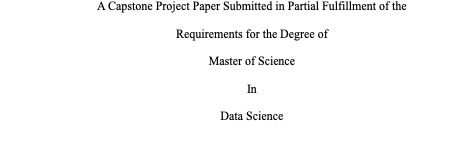
> "A Capstone Project Paper Submitted in Partial Fulfillment of the
Requirements for the Degree of
Master of Science
In
Data Science
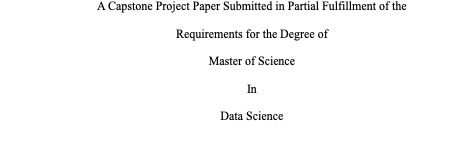"

- toc:true- branch: master- badges: true- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

ABSTRACT
Using Deep Learning to Classify Airliner Flight Profiles for Post-Flight Analysis
Kobus Esterhuysen

Capstone Project for Master of Science in Data Science
University of Wisconsin – Oshkosh
Oshkosh, WI
2019

This project suggests an automatic way for post-flight analysts to undertake classification of flight profiles into useful versus non-useful classes. Instead of using the traditional algorithms for time-series classification, this work makes use of a relatively new approach: Before classifying, first transform a time-series into an image. This allows for the application of a well-developed set of algorithms from the area of computer vision. In this project, we perform a comparison of a number of these transformation techniques in terms of their associated image classification performance. We apply each transformation technique to the time-series dataset in turn, train a Convolutional Neural Network to do classification, and record the performance. Then we select the most performant transformation technique (a simple line plot that got a 100% F1-score) and use it in the rest of the analysis pipeline.

The pipeline consists of three models. The first model classifies flight profiles into developed (useful) and non-developed (non-useful) profiles. The second model performs multi-label classification on the developed profiles from the first model. The labels reflect whether a profile has canonical climb/cruise/descent segments. The last model classifies flight profiles with canonical cruise segments into classes that have extended cruises (useful) and shorter cruises (non-useful).

Next, we prepare a significant unlabeled test dataset, consisting of data points that have never been seen by any of the models. We construct an end-to-end analytic inference process to simulate a production system, apply it to the test dataset, and obtain impressive results. Finally, we make recommendations to post-flight and other interested analysts.

Keywords: Deep learning, Time series, Image Classification, CNN, RNN, Flight path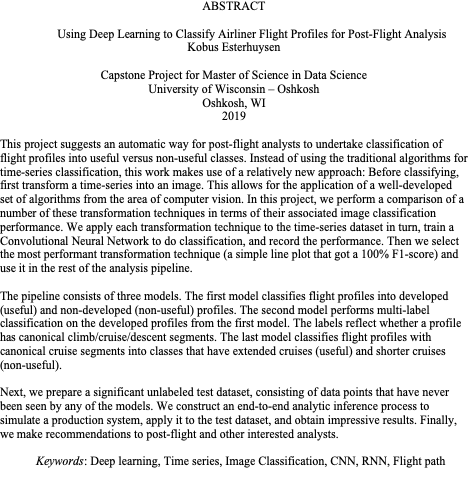